# Immo Eliza Analysis

This notebook presents an analysis of a dataset from Immo Eliza. The goal of this analysis is to understand various factors influencing property prices and visualize these insights using different plots. Additionally, we aim to prepare the data for training a predictive model to estimate house and apartment prices in Belgium.

The dataset includes details about properties such as price, location, type of sale, and various physical characteristics. We will go through the process of loading, cleaning, and visualizing the data.


In [15]:
import pandas as pd

dataset_cleaned = pd.read_csv("cleaned_location_dataset.csv")


## Data Cleaning

To ensure the accuracy of our analysis, we need to clean the dataset. This includes calculating the price per square meter and removing outliers that might skew our results.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_cleaned["PricePerSqM"] = dataset_cleaned["Price"] / dataset_cleaned["TotalArea"]

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

dataset_cleaned = remove_outliers(dataset_cleaned, "PricePerSqM")


## Data Visualization

We will create bar plots to visualize the average price per square meter for residential sales and monthly rents by province, district, and region.


In [7]:
sale_data = dataset_cleaned[dataset_cleaned["TypeOfSale"] == "residential_sale"]
rent_data = dataset_cleaned[dataset_cleaned["TypeOfSale"] == "residential_monthly_rent"]

sns.set(style="whitegrid")


### Average Price per Square Meter by Province (Residential Sale)


/tmp/ipykernel_103033/685492188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Province", y="PricePerSqM", data=province_sale_price, palette="coolwarm")


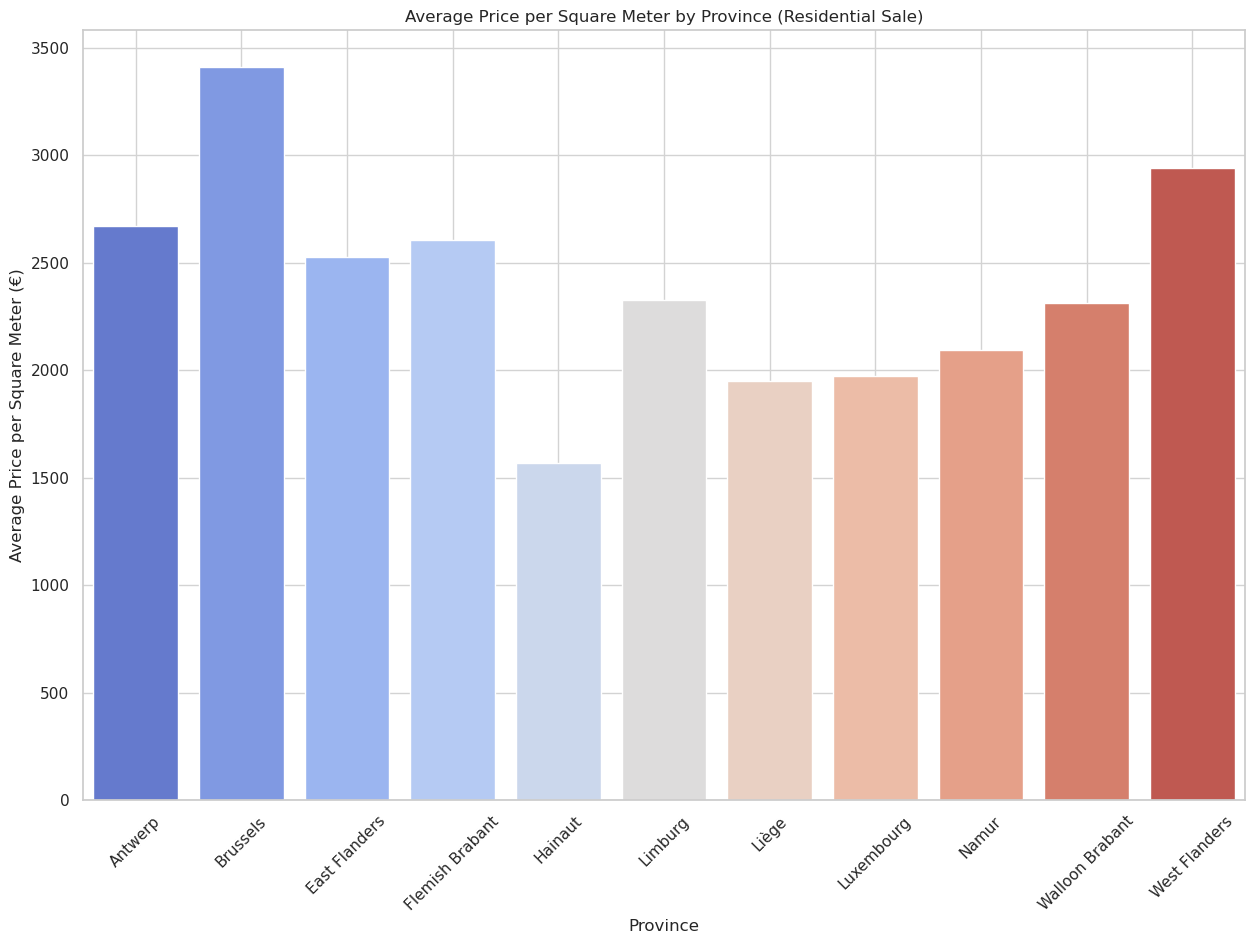

In [8]:
plt.figure(figsize=(15, 10))
province_sale_price = sale_data.groupby("Province")["PricePerSqM"].mean().reset_index()
sns.barplot(x="Province", y="PricePerSqM", data=province_sale_price, palette="coolwarm")
plt.title("Average Price per Square Meter by Province (Residential Sale)")
plt.xlabel("Province")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=45)
plt.grid(True, color="lightgrey")
plt.show()


### Average Price per Square Meter by District (Residential Sale)


/tmp/ipykernel_103033/2330896371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District", y="PricePerSqM", data=district_sale_price, palette="Spectral")


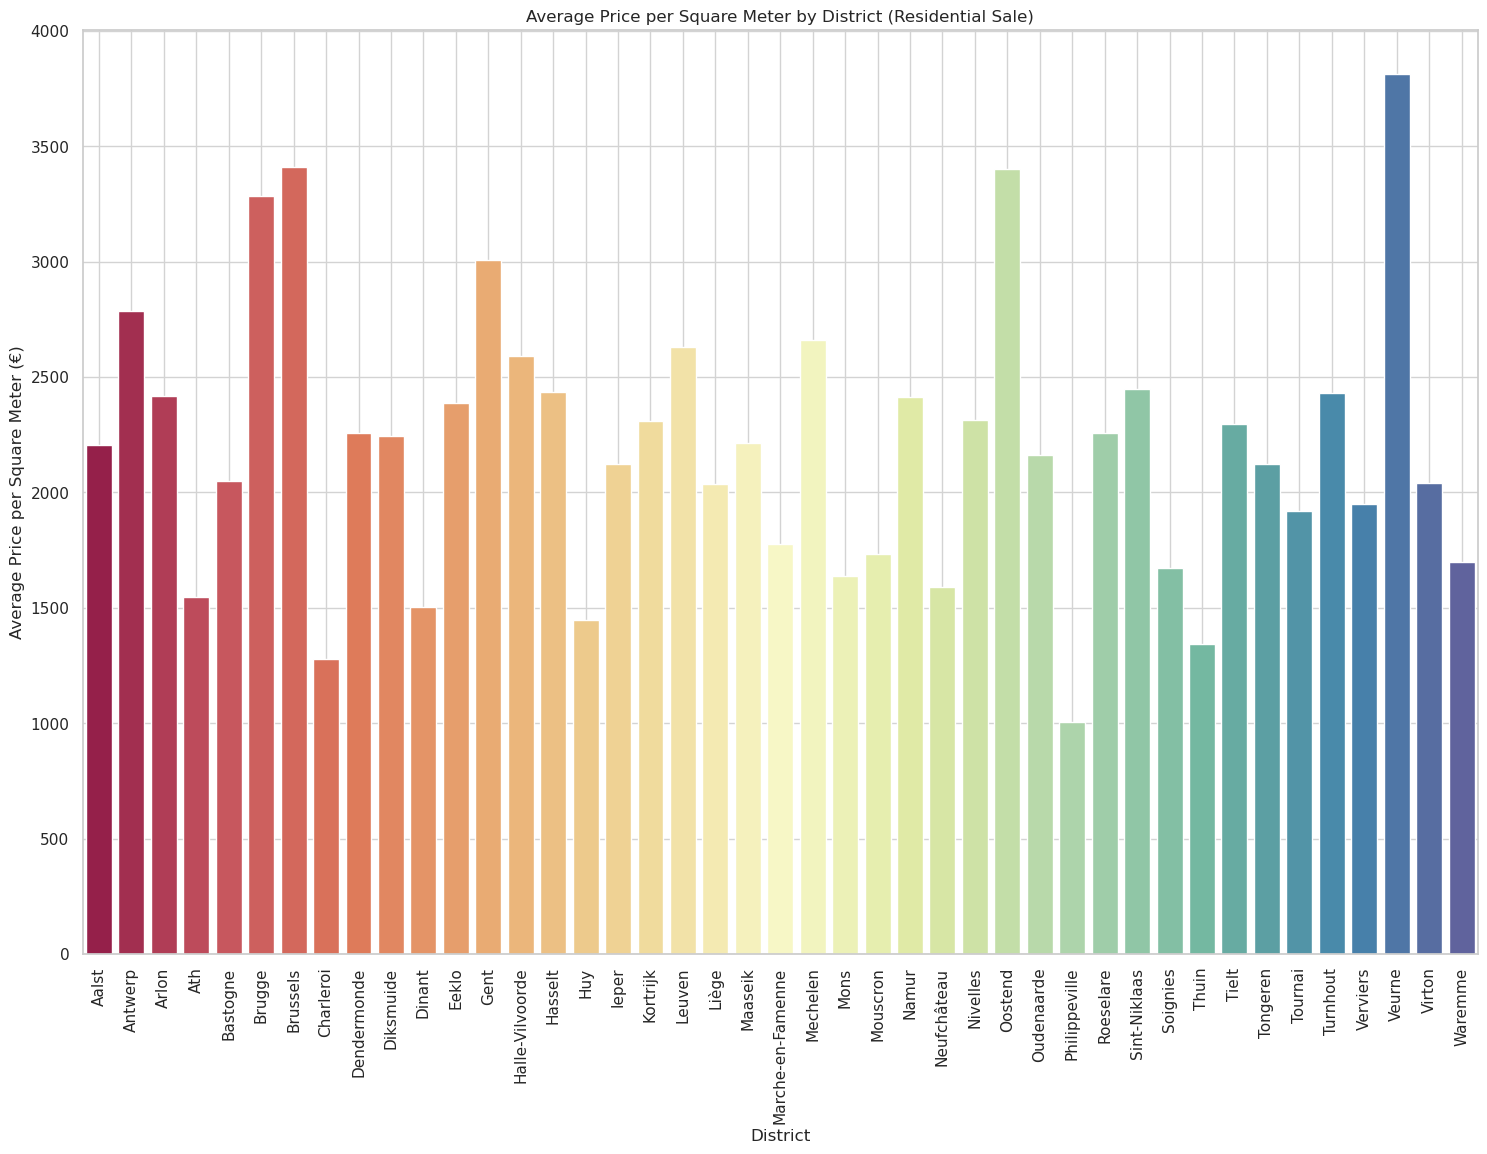

In [9]:
plt.figure(figsize=(18, 12))
district_sale_price = sale_data.groupby("District")["PricePerSqM"].mean().reset_index()
sns.barplot(x="District", y="PricePerSqM", data=district_sale_price, palette="Spectral")
plt.title("Average Price per Square Meter by District (Residential Sale)")
plt.xlabel("District")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=90)
plt.grid(True, color="lightgrey")
plt.show()


### Average Price per Square Meter by Region (Residential Sale)


/tmp/ipykernel_103033/3636049961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="PricePerSqM", data=region_sale_price, palette="Accent")


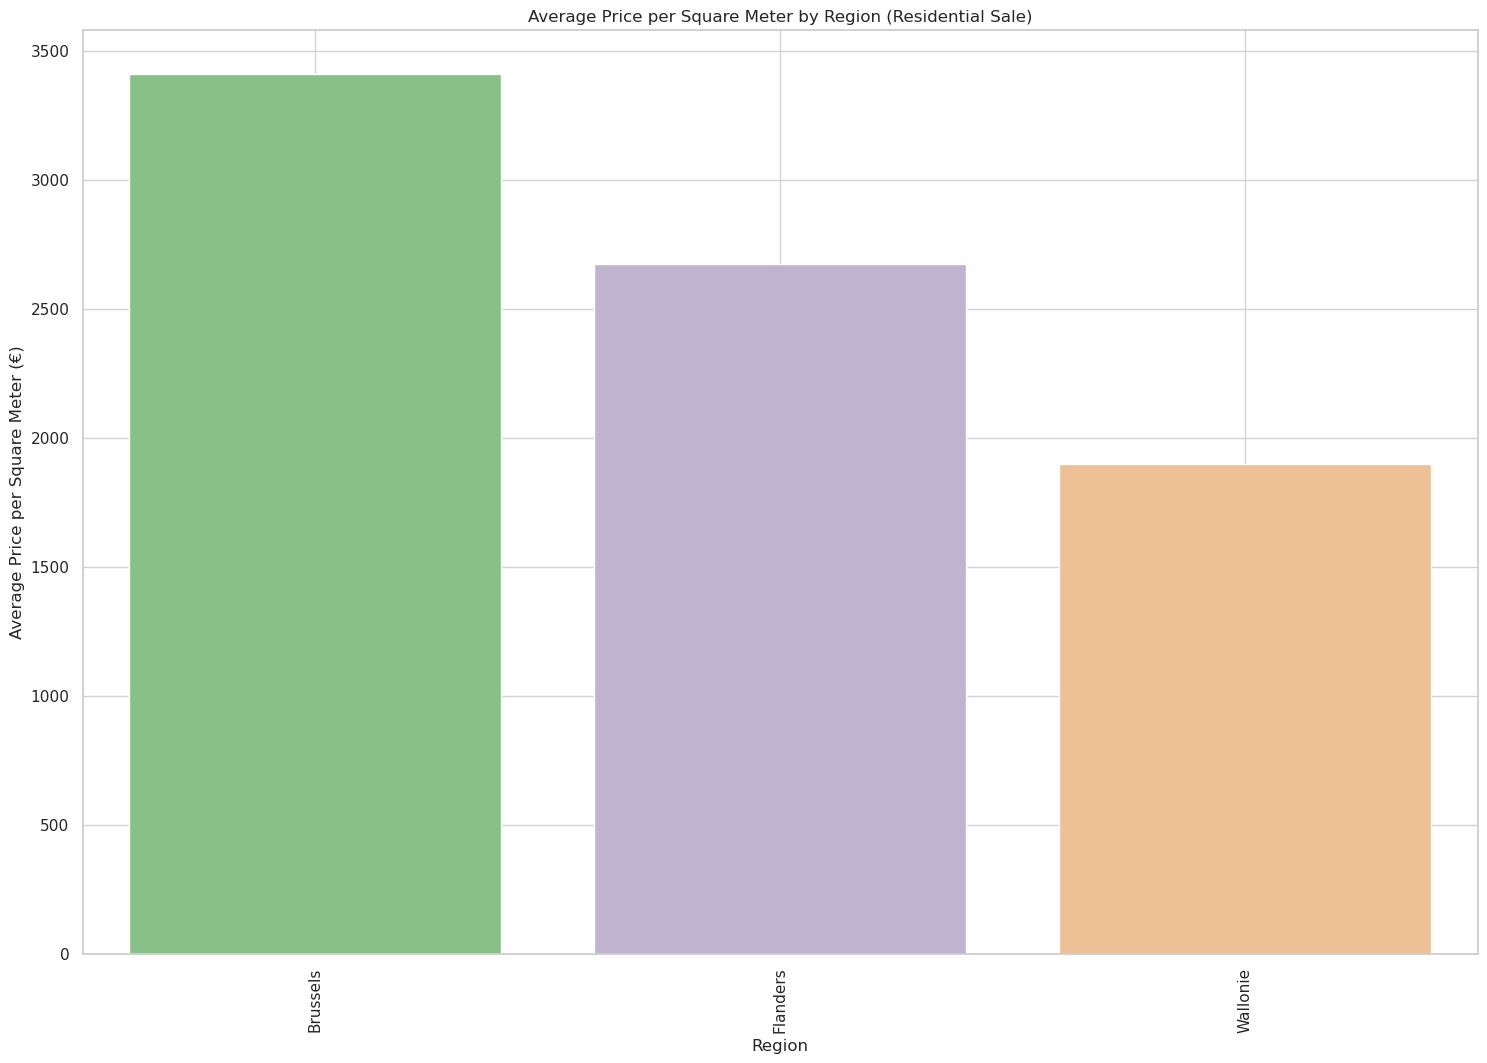

In [10]:
plt.figure(figsize=(18, 12))
region_sale_price = sale_data.groupby("Region")["PricePerSqM"].mean().reset_index()
sns.barplot(x="Region", y="PricePerSqM", data=region_sale_price, palette="Accent")
plt.title("Average Price per Square Meter by Region (Residential Sale)")
plt.xlabel("Region")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=90)
plt.grid(True, color="lightgrey")
plt.show()


### Average Price per Square Meter by Province (Residential Monthly Rent)


/tmp/ipykernel_103033/3768488838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Province", y="PricePerSqM", data=province_rent_price, palette="Pastel1")


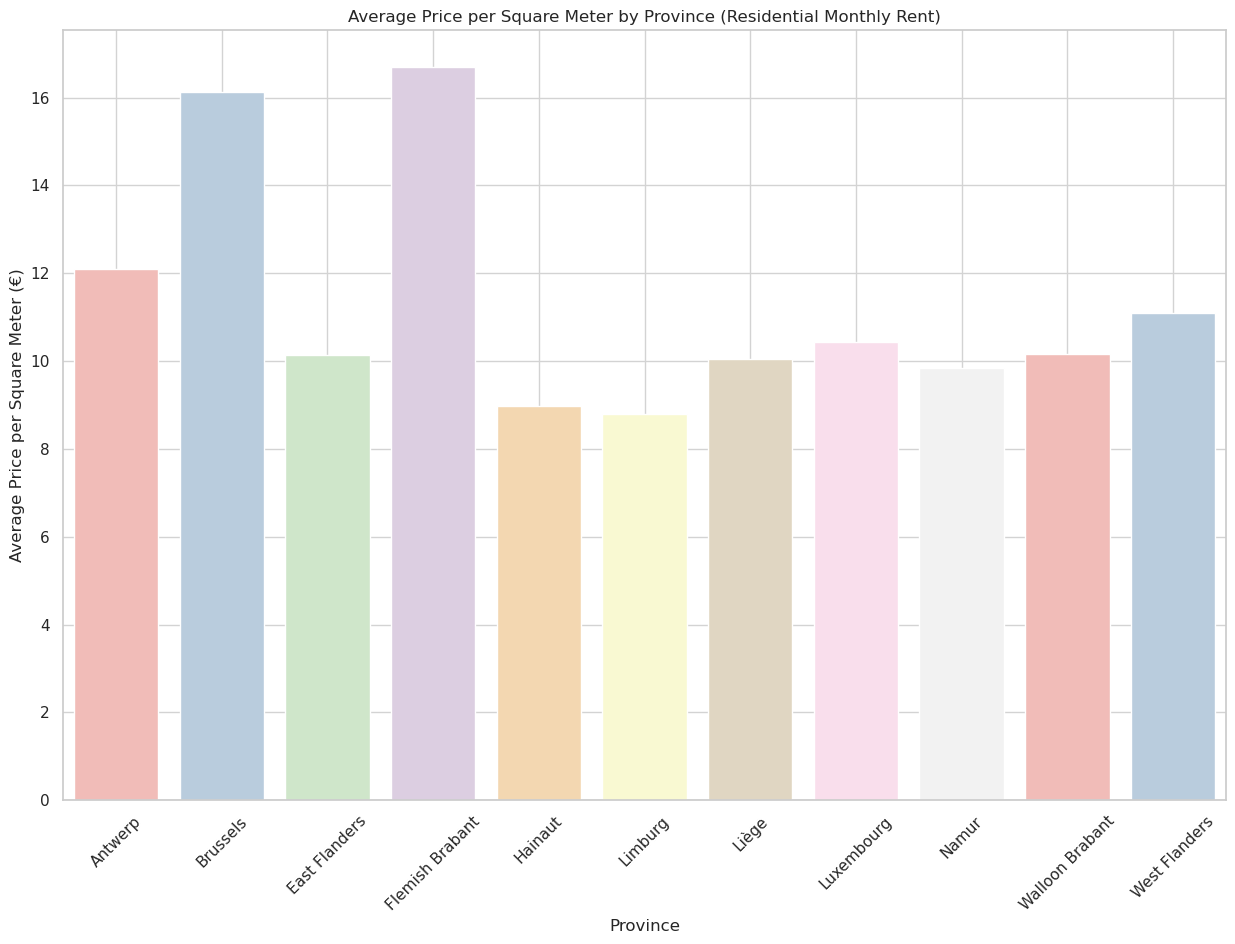

In [11]:
plt.figure(figsize=(15, 10))
province_rent_price = rent_data.groupby("Province")["PricePerSqM"].mean().reset_index()
sns.barplot(x="Province", y="PricePerSqM", data=province_rent_price, palette="Pastel1")
plt.title("Average Price per Square Meter by Province (Residential Monthly Rent)")
plt.xlabel("Province")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=45)
plt.grid(True, color="lightgrey")
plt.show()


### Average Price per Square Meter by District (Residential Monthly Rent)


/tmp/ipykernel_103033/4095298254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District", y="PricePerSqM", data=district_rent_price, palette="Dark2")


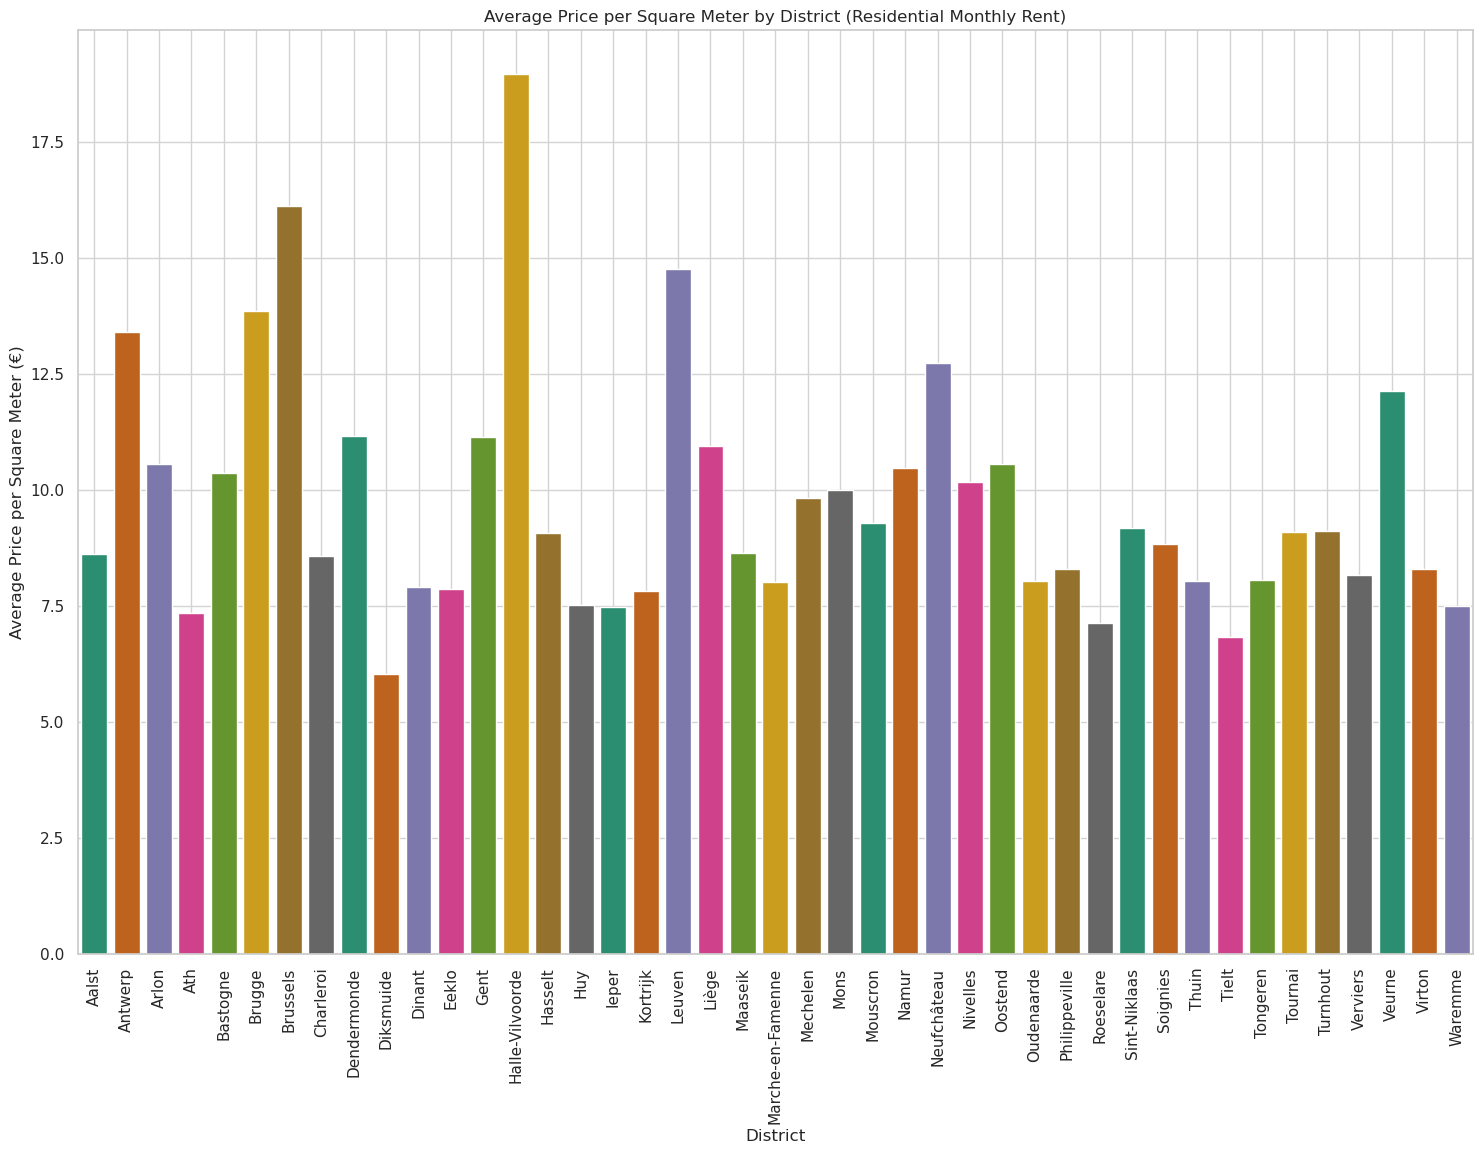

In [12]:
plt.figure(figsize=(18, 12))
district_rent_price = rent_data.groupby("District")["PricePerSqM"].mean().reset_index()
sns.barplot(x="District", y="PricePerSqM", data=district_rent_price, palette="Dark2")
plt.title("Average Price per Square Meter by District (Residential Monthly Rent)")
plt.xlabel("District")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=90)
plt.grid(True, color="lightgrey")
plt.show()


### Average Price per Square Meter by Region (Residential Monthly Rent)


/tmp/ipykernel_103033/2318804660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="PricePerSqM", data=region_rent_price, palette="Set3")


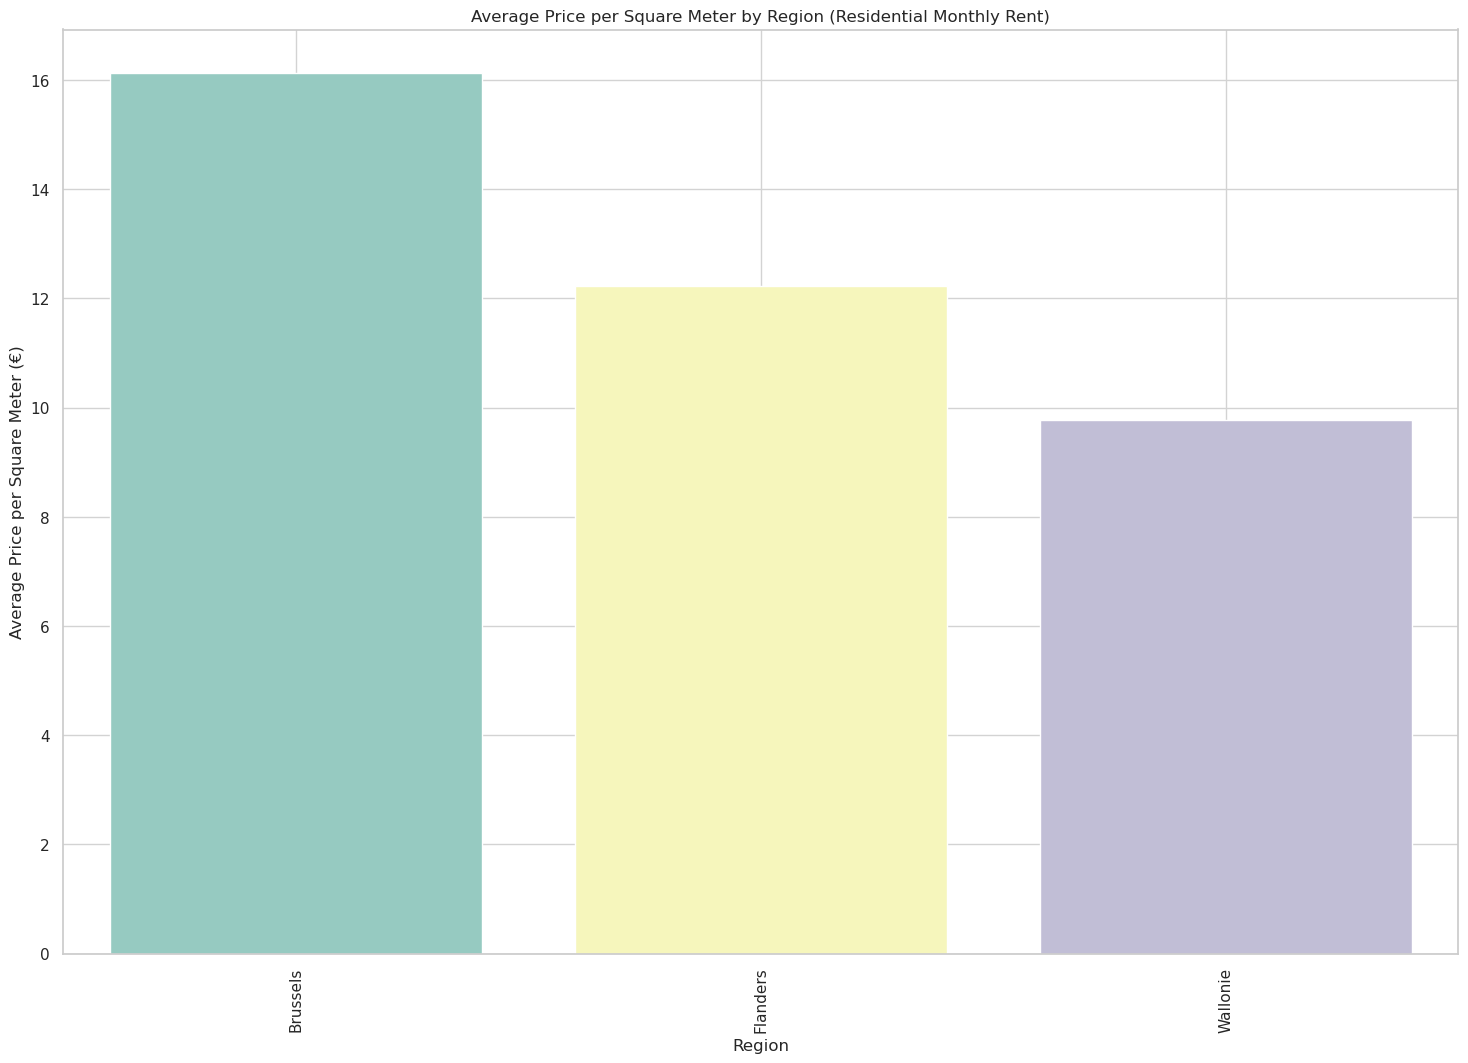

In [13]:
plt.figure(figsize=(18, 12))
region_rent_price = rent_data.groupby("Region")["PricePerSqM"].mean().reset_index()
sns.barplot(x="Region", y="PricePerSqM", data=region_rent_price, palette="Set3")
plt.title("Average Price per Square Meter by Region (Residential Monthly Rent)")
plt.xlabel("Region")
plt.ylabel("Average Price per Square Meter (€)")
plt.xticks(rotation=90)
plt.grid(True, color="lightgrey")
plt.show()


## Correlation Analysis

Finally, we will create a correlation heatmap to explore the relationships between different numeric variables in the dataset.


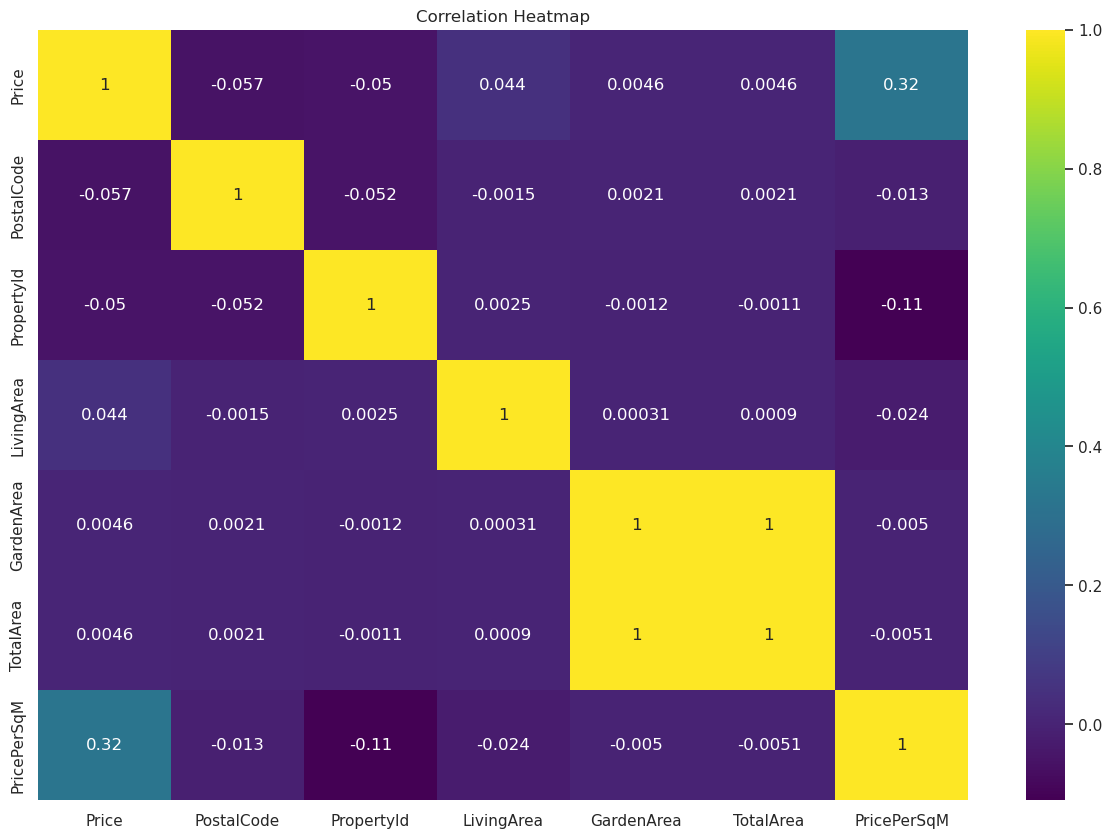

In [14]:
# Include more columns in the correlation matrix
numeric_cols = dataset_cleaned.select_dtypes(include=[float, int]).columns
correlation_matrix = dataset_cleaned[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
